In [ ]:
# check if this instance of the notebook already has files present
# and thus determine which steps required prior to reading in file and handling the data
!ls


sample_data


In [ ]:
# set-up spark (NB if Apache amend versions on download site we will need to amend path in wget command)
## NOTE that this version would make use of Hadoop if installed BUT that HDFS & Hadoop is not installed on our Colab
## (we are only using a single node (probably as a VM) so we will not be able to benefit from parallelism)
!clear
!echo welcome

!rm -f spark-3.4.[01]-bin-hadoop3.tgz*
!rm -rf spark-3.4.[01]-bin-hadoop3

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-3.4.4/spark-3.4.4-bin-hadoop3.tgz
!tar -xf spark-3.4.4-bin-hadoop3.tgz

!ls -alt
print("standalone Spark is now installed")

welcome
--2025-05-04 10:09:14--  https://downloads.apache.org/spark/spark-3.4.4/spark-3.4.4-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.208.237, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 388988563 (371M) [application/x-gzip]
Saving to: ‘spark-3.4.4-bin-hadoop3.tgz’

spark-3.4.4-bin-had 100%[===================>] 370.97M  23.0MB/s    in 17s     

2025-05-04 10:09:31 (21.5 MB/s) - ‘spark-3.4.4-bin-hadoop3.tgz’ saved [388988563/388988563]

total 379892
drwxr-xr-x  1 root root      4096 May  4 10:09 .
drwxr-xr-x  1 root root      4096 May  4 10:07 ..
drwxr-xr-x  1 root root      4096 Apr 30 13:37 sample_data
drwxr-xr-x  4 root root      4096 Apr 30 13:37 .config
-rw-r--r--  1 root root 388988563 Oct 21  2024 spark-3.4.4-bin-hadoop3.tgz
drwxr-xr-x 13 1000 1000      4096 Oct 21  2024 spark-3.4.4-bin-hadoop3
stan

In [ ]:
# init spark (ensure SPARK_HOME set to same version as we download earlier)
!pip3 install findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.4-bin-hadoop3"
import findspark
findspark.init()

from pyspark import SparkConf, SparkContext
# the next line gives us 'local' mode. try 'local[2]' to use 2 cores or 'master:NNNN' to run on Spark standalone cluster at port NNNN
spark_conf = SparkConf().setMaster('local[2]').setAppName('MyApp')
sc = SparkContext(conf=spark_conf)

# see what we have by examining the Spark User Interface
from pyspark.sql import *
from pyspark.sql.functions import *
SparkSession.builder.getOrCreate()


In [ ]:
## this is how one could upload a file into colab using the colab GUI (uncomment both lines if want to try it)

#from google.colab import files
#files.upload()


In [ ]:
# get file
#!wget https://www.kaggle.com/api/v1/datasets/download/saurav9786/amazon-product-reviews/archive.zip
#!unzip archive.zip

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
# change current working directory
import os
os.chdir ('/content/drive/MyDrive/Big Data/')

In [ ]:
# read in file
!ls
file="/content/drive/MyDrive/Big Data/ratingsElectronics.csv"
spark = SparkSession.builder.appName("Amazon-product-reviews").getOrCreate()
j_df = (spark.read.format("csv")
         .option("header", "false")
         .option("inferSchema", "true")
         .load(file))

# show top 10
j_df.show(10)

'Average Reviews for High vs. Low Rating Product for 2014 Q2.png'
'Bo Kwok 22454220 Big Data Step 1.ipynb'
'Bo Kwok 22454220 Big Data Step 3.ipynb'
 mean_ratings_Comparison_for_2014_Q2.png
 ratingsElectronics.csv
 ratingsElectronics_with_headers.csv
 review_count_distribution_boxplot_2014_Q2.png
 spark-3.4.4-bin-hadoop3
 spark-3.4.4-bin-hadoop3.tgz
 spark-3.4.4-bin-hadoop3.tgz.1
'test Big Data Step 1.ipynb'
'test Big Data Step 3.ipynb'
 Untitled0.ipynb
 week5_cycleHire.ipynb
+--------------+----------+---+----------+
|           _c0|       _c1|_c2|       _c3|
+--------------+----------+---+----------+
| AKM1MP6P0OYPR|0132793040|5.0|1365811200|
|A2CX7LUOHB2NDG|0321732944|5.0|1341100800|
|A2NWSAGRHCP8N5|0439886341|1.0|1367193600|
|A2WNBOD3WNDNKT|0439886341|3.0|1374451200|
|A1GI0U4ZRJA8WN|0439886341|1.0|1334707200|
|A1QGNMC6O1VW39|0511189877|5.0|1397433600|
|A3J3BRHTDRFJ2G|0511189877|2.0|1397433600|
|A2TY0BTJOTENPG|0511189877|5.0|1395878400|
|A34ATBPOK6HCHY|0511189877|5.0|1395532800|
| A8

In [ ]:
# create dataframe
columns = ["userId", "productId", "Rating", "timestamp"]
df = j_df.toDF(*columns)

# show top 10
df.show(10)

# save dataframe to csv with headers
new_file_path = "/content/drive/MyDrive/Big Data/ratingsElectronics_with_headers.csv"
df.write.csv(new_file_path, header=True, mode="overwrite")

# convert timestamp column to Unix long format
df = df.withColumn("timestamp", col("timestamp").cast("long"))

# define date range and check if the unix are correct
start_date = 1396310400
end_date =1404172799
start_date_not_Unix = spark.sql(f"SELECT from_unixtime({start_date}, 'yyyy-MM-dd HH:mm:ss')")
start_date_not_Unix.show(truncate=False)
end_date_not_Unix = spark.sql(f"SELECT from_unixtime({end_date}, 'yyyy-MM-dd HH:mm:ss')")
end_date_not_Unix.show(truncate=False)

# filter data for 2014 Q2
df_20140401_20140630 = df.filter((col("timestamp") >= start_date) & (col("timestamp") <= end_date))
df_20140401_20140630.show(10)

# aggregate average rating and number of reviews per product
product_data_calculation = df_20140401_20140630.groupBy ("productID"). agg(
          avg("Rating").alias ("avg_rating"),
          count("Rating").alias("num_review"))

# filter products into high-rated (>=3) and low-rated product groups
products_high_rating = product_data_calculation.filter(col("avg_rating") >= 3).select("num_review").rdd.flatMap(lambda x: x).collect()
products_low_rating = product_data_calculation.filter(col("avg_rating") < 3).select("num_review").rdd.flatMap(lambda x: x).collect()

# perform t-test
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(products_high_rating, products_low_rating, equal_var=False)
print(f"t_statistic = {t_statistic}")
print(f"p_value = {p_value}")

# hypothesis testing
products_high_rating_mean = product_data_calculation.filter(col("avg_rating") >= 3).agg(mean("num_review")).collect()
products_low_rating_mean = product_data_calculation.filter(col("avg_rating") < 3).agg(mean("num_review")).collect()
print(f"products_high_rating_mean = {products_high_rating_mean}")
print(f"products_low_rating_mean = {products_low_rating_mean}")

alpha = 0.05
if p_value / 2 < alpha and products_high_rating_mean > products_low_rating_mean:
      print("In Q2 2014 (April 1 - June 30, 2014), products that received an average rating of 3 or higher had significantly more reviews compared to products with an average rating below 3.")
else:
      print("In Q2 2014 (April 1 - June 30, 2014), products that received an average rating of 3 or higher had not significantly more reviews compared to products with an average rating below 3.")

+--------------+----------+------+----------+
|        userId| productId|Rating| timestamp|
+--------------+----------+------+----------+
| AKM1MP6P0OYPR|0132793040|   5.0|1365811200|
|A2CX7LUOHB2NDG|0321732944|   5.0|1341100800|
|A2NWSAGRHCP8N5|0439886341|   1.0|1367193600|
|A2WNBOD3WNDNKT|0439886341|   3.0|1374451200|
|A1GI0U4ZRJA8WN|0439886341|   1.0|1334707200|
|A1QGNMC6O1VW39|0511189877|   5.0|1397433600|
|A3J3BRHTDRFJ2G|0511189877|   2.0|1397433600|
|A2TY0BTJOTENPG|0511189877|   5.0|1395878400|
|A34ATBPOK6HCHY|0511189877|   5.0|1395532800|
| A89DO69P0XZ27|0511189877|   5.0|1395446400|
+--------------+----------+------+----------+
only showing top 10 rows

+----------------------------------------------+
|from_unixtime(1396310400, yyyy-MM-dd HH:mm:ss)|
+----------------------------------------------+
|2014-04-01 00:00:00                           |
+----------------------------------------------+

+----------------------------------------------+
|from_unixtime(1404172799, yyyy-MM-

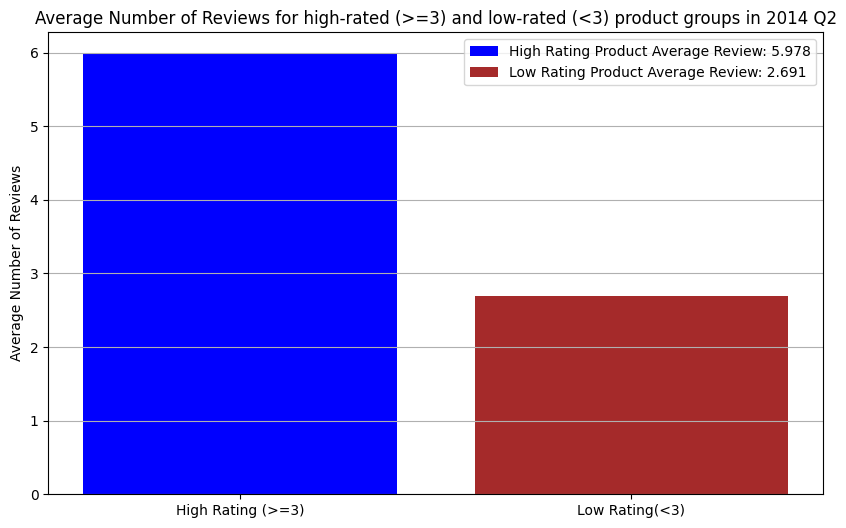

In [ ]:
import matplotlib.pyplot as plt

# plot average number of reviews for high-rated (>=3) and low-rated (<3) product groups in 2014 Q2
product_high_rating_review_mean = products_high_rating_mean[0]['avg(num_review)']
product_low_rating_review_mean = products_low_rating_mean[0]['avg(num_review)']

plt.figure(figsize=(10, 6))
plt.bar(['High Rating (>=3)', 'Low Rating(<3)'], [product_high_rating_review_mean, product_low_rating_review_mean],
        color=['blue', 'brown'], label=[f'High Rating Product Average Review: {product_high_rating_review_mean:.3f}', f'Low Rating Product Average Review: {product_low_rating_review_mean:.3f}'])
plt.ylabel('Average Number of Reviews')
plt.title('Average Number of Reviews for high-rated (>=3) and low-rated (<3) product groups in 2014 Q2')
plt.grid(axis='y')
plt.legend()
plt.savefig("Average Reviews for High vs. Low Rating Product for 2014 Q2.png")
plt.show()

<ipython-input-11-63edb3260b5a>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([products_high_rating, products_low_rating], labels=['High Rating (>=3)', 'Low Rating(<3)'])


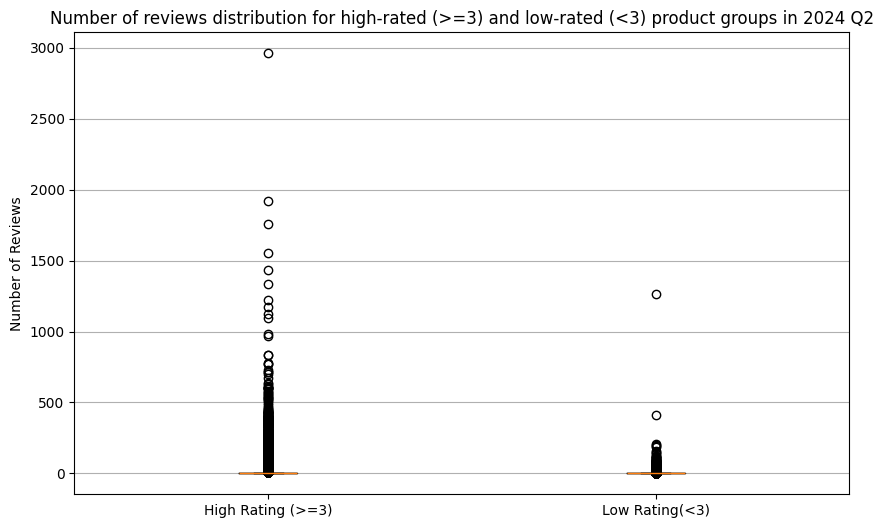

In [ ]:
# plot number of reviews distribution for high-rated (>=3) and low-rated (<3) product groups in 2024 Q2
plt.figure(figsize=(10, 6))
plt.boxplot([products_high_rating, products_low_rating], labels=['High Rating (>=3)', 'Low Rating(<3)'])
plt.ylabel('Number of Reviews')
plt.title ('Number of reviews distribution for high-rated (>=3) and low-rated (<3) product groups in 2024 Q2')
plt.grid(axis='y')
plt.savefig('review_count_distribution_boxplot_2014_Q2.png')
plt.show()

In [ ]:
# calculate mean of average rating for high-rated (>=3) and low-rated (<3) product groups for April 2014
start_date_201404 = 1396310400
end_date_201404 = 1398902399
start_date_201404_not_Unix = spark.sql(f"SELECT from_unixtime({start_date_201404},'yyyy-MM-dd HH:mm:ss')")
start_date_201404_not_Unix.show (truncate=False)
end_date_201404_not_Unix = spark.sql(f"SELECT from_unixtime({end_date_201404},'yyyy-MM-dd HH:mm:ss')")
end_date_201404_not_Unix.show (truncate=False)

df_20140401_20140430 = df.filter((col("timestamp") >= start_date_201404) & (col("timestamp") <= end_date_201404))
Product_ratings_201404 = df_20140401_20140430.groupBy("productId").agg(
    avg("Rating").alias("mean_rating_201404")
)

print("Sample of April 2014 product ratings:")
Product_ratings_201404.show(20)

high_rating_201404 = Product_ratings_201404.filter(col("mean_rating_201404") >= 3)
high_rating_mean_201404 = high_rating_201404.agg(
    avg("mean_rating_201404").alias("mean_rating_high")
).collect()[0]["mean_rating_high"]

print (f"Mean of Average rating for products with rating >= 3 in April 2014: {high_rating_mean_201404:.3f}")

low_rating_201404 = Product_ratings_201404.filter(col("mean_rating_201404") < 3)
low_rating_mean_201404 = low_rating_201404.agg(
    avg("mean_rating_201404").alias("mean_rating_low")
).collect()[0]["mean_rating_low"]

print (f"Mean of Average rating for products with rating < 3 in April 2014: {low_rating_mean_201404:.3f}")

+----------------------------------------------+
|from_unixtime(1396310400, yyyy-MM-dd HH:mm:ss)|
+----------------------------------------------+
|2014-04-01 00:00:00                           |
+----------------------------------------------+

+----------------------------------------------+
|from_unixtime(1398902399, yyyy-MM-dd HH:mm:ss)|
+----------------------------------------------+
|2014-04-30 23:59:59                           |
+----------------------------------------------+

Sample of April 2014 product ratings:
+----------+------------------+
| productId|mean_rating_201404|
+----------+------------------+
|7793224531|               5.0|
|B00000J0IV|               4.0|
|B00001W0DC|               4.0|
|B00005T3Z7|               4.0|
|B00006HXTB|               5.0|
|B00008XOHT|               3.0|
|B00021EE4U|              4.25|
|B00023JK8I|               5.0|
|B0002D05RI|               5.0|
|B0002DVBBW|               5.0|
|B0002EQU6C|               5.0|
|B0002LEMWE| 4.8235294

In [ ]:
# calculate mean of average rating for high-rated (>=3) and low-rated (<3) product groups for May 2014
start_date_201405 = 1398902400
end_date_201405 = 1401580799
start_date_201405_not_Unix = spark.sql(f"SELECT from_unixtime({start_date_201405},'yyyy-MM-dd HH:mm:ss')")
start_date_201405_not_Unix.show (truncate=False)
end_date_201405_not_Unix = spark.sql(f"SELECT from_unixtime({end_date_201405},'yyyy-MM-dd HH:mm:ss')")
end_date_201405_not_Unix.show (truncate=False)

df_20140501_20140531 = df.filter((col("timestamp") >= start_date_201405) & (col("timestamp") <= end_date_201405))
Product_ratings_201405 = df_20140501_20140531.groupBy("productId").agg(
    avg("Rating").alias("mean_rating_201405")
)

print("Sample of May 2014 product ratings:")
Product_ratings_201405.show(20)

high_rating_201405 = Product_ratings_201405.filter(col("mean_rating_201405") >= 3)
high_rating_mean_201405 = high_rating_201405.agg(
    avg("mean_rating_201405").alias("mean_rating_high")
).collect()[0]["mean_rating_high"]

print (f"Mean of Average rating for products with rating >= 3 in May 2014: {high_rating_mean_201405:.3f}")

low_rating_201405 = Product_ratings_201405.filter(col("mean_rating_201405") < 3)
low_rating_mean_201405 = low_rating_201405.agg(
    avg("mean_rating_201405").alias("mean_rating_low")
).collect()[0]["mean_rating_low"]

print (f"Mean of Average rating for products with rating < 3 in May 2014: {low_rating_mean_201405:.3f}")

+----------------------------------------------+
|from_unixtime(1398902400, yyyy-MM-dd HH:mm:ss)|
+----------------------------------------------+
|2014-05-01 00:00:00                           |
+----------------------------------------------+

+----------------------------------------------+
|from_unixtime(1401580799, yyyy-MM-dd HH:mm:ss)|
+----------------------------------------------+
|2014-05-31 23:59:59                           |
+----------------------------------------------+

Sample of May 2014 product ratings:
+----------+------------------+
| productId|mean_rating_201405|
+----------+------------------+
|9966694242|               4.0|
|B00005T3P9|               5.0|
|B00005T3Z7|               4.0|
|B000063S3Z|               1.0|
|B0000UV0IQ|               4.0|
|B00021EE4U|              4.25|
|B000293P5G|               2.0|
|B0002D05RI|               4.0|
|B0002EQU6C|               5.0|
|B0002LEMWE| 4.428571428571429|
|B0002MQGOA|               4.2|
|B0002MQJJM|            

In [ ]:
# calculate mean of average rating for high-rated (>=3) and low-rated (<3) product groups for June 2014
start_date_201406 = 1401580800
end_date_201406 = 1404172799
start_date_201406_not_Unix = spark.sql(f"SELECT from_unixtime({start_date_201406},'yyyy-MM-dd HH:mm:ss')")
start_date_201406_not_Unix.show (truncate=False)
end_date_201406_not_Unix = spark.sql(f"SELECT from_unixtime({end_date_201406},'yyyy-MM-dd HH:mm:ss')")
end_date_201406_not_Unix.show (truncate=False)

df_20140601_20140630 = df.filter((col("timestamp") >= start_date_201406) & (col("timestamp") <= end_date_201406))
Product_ratings_201406 = df_20140601_20140630.groupBy("productId").agg(
    avg("Rating").alias("mean_rating_201406")
)

print("Sample of June 2014 product ratings:")
Product_ratings_201406.show(20)

high_rating_201406 = Product_ratings_201406.filter(col("mean_rating_201406") >= 3)
high_rating_mean_201406 = high_rating_201406.agg(
    avg("mean_rating_201406").alias("mean_rating_high")
).collect()[0]["mean_rating_high"]

print (f"Mean of Average rating for products with rating >= 3 in June 2014: {high_rating_mean_201406:.3f}")

low_rating_201406 = Product_ratings_201406.filter(col("mean_rating_201406") < 3)
low_rating_mean_201406 = low_rating_201406.agg(
    avg("mean_rating_201406").alias("mean_rating_low")
).collect()[0]["mean_rating_low"]

print (f"Mean of Average rating for products with rating < 3 in June 2014: {low_rating_mean_201406:.3f}")

+----------------------------------------------+
|from_unixtime(1401580800, yyyy-MM-dd HH:mm:ss)|
+----------------------------------------------+
|2014-06-01 00:00:00                           |
+----------------------------------------------+

+----------------------------------------------+
|from_unixtime(1404172799, yyyy-MM-dd HH:mm:ss)|
+----------------------------------------------+
|2014-06-30 23:59:59                           |
+----------------------------------------------+

Sample of June 2014 product ratings:
+----------+------------------+
| productId|mean_rating_201406|
+----------+------------------+
|9967222247|               5.0|
|B000000O3J|               5.0|
|B00001W0DC|               4.0|
|B00006L4F4|               3.0|
|B00008ZPN3|               5.0|
|B00009ZKWG|               4.0|
|B0000AKACN|               4.0|
|B0000UV0IQ|               5.0|
|B00021EE4U|               3.5|
|B00021Z98A|               4.0|
|B0002DVBBW|               3.0|
|B0002EQU6C|           

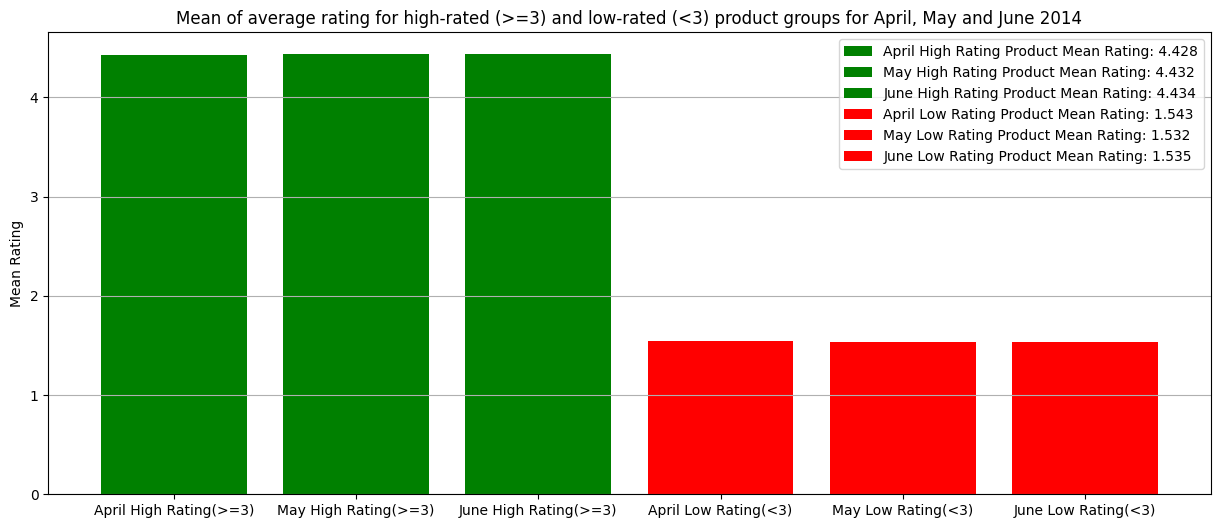

In [ ]:
# plot mean of average rating for high-rated (>=3) and low-rated (<3) product groups for April, May and June 2014
plt.figure(figsize=(15, 6))
plt.bar(['April High Rating(>=3)', 'May High Rating(>=3)', 'June High Rating(>=3)', 'April Low Rating(<3)', 'May Low Rating(<3)', 'June Low Rating(<3)'],
        [high_rating_mean_201404, high_rating_mean_201405, high_rating_mean_201406, low_rating_mean_201404, low_rating_mean_201405, low_rating_mean_201406]
        , color=['green', 'green', 'green', 'red', 'red', 'red'],
        label=[f'April High Rating Product Mean Rating: {high_rating_mean_201404:.3f}',f'May High Rating Product Mean Rating: {high_rating_mean_201405:.3f}',
              f'June High Rating Product Mean Rating: {high_rating_mean_201406:.3f}',f'April Low Rating Product Mean Rating: {low_rating_mean_201404:.3f}',
              f'May Low Rating Product Mean Rating: {low_rating_mean_201405:.3f}', f'June Low Rating Product Mean Rating: {low_rating_mean_201406:.3f}'])

plt.ylabel('Mean Rating')
plt.title('Mean of average rating for high-rated (>=3) and low-rated (<3) product groups for April, May and June 2014')
plt.grid(axis='y')
plt.legend()
plt.savefig('mean_ratings_Comparison_for_2014_Q2.png')
plt.show()